In [1]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import load_dataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
dataset = load_dataset("lex_glue", "ecthr_a")  # أو "ledgar"/"scotus" حسب اختيارك

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/5.68M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/5.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [4]:
from transformers import pipeline

classifier = pipeline("text-generation", model="gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [5]:
# 1. تحميل البيانات
from datasets import load_dataset
dataset = load_dataset("lex_glue", "ledgar")  # أو "scotus"

# 2. أخذ عينة نصية
example_text = dataset["test"][0]["text"]  # أو "train" بدلاً من "test" لو حبيتي

# 3. تحميل نموذج توليد النصوص
from transformers import pipeline
classifier = pipeline("text-generation", model="gpt2")

# 4. بناء البرومبت
prompt = (
    "Given the following legal document, classify it into one of the categories "
    "(e.g., Contract, Memo, Agreement):\n\n"
    f"Document:\n{example_text}\n\nLabel:"
)

# 5. استخدام النموذج للتصنيف
output = classifier(prompt, max_new_tokens=15)
print(output[0]["generated_text"])

train-00000-of-00001.parquet:   0%|          | 0.00/20.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.31M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/3.44M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Given the following legal document, classify it into one of the categories (e.g., Contract, Memo, Agreement):

Document:
Executive agrees to be employed with the Company, and the Company agrees to employ Executive, during the Term and on the terms and conditions set forth in this Agreement. Executive agrees during the term of this Agreement to devote substantially all of Executive’s business time, efforts, skills and abilities to the performance of Executive’s duties to the Company and to the furtherance of the Company's business.

Label:

Executive agrees to be employed with the Company, and the Company agrees


In [6]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [7]:
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True)

tokenized_dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [1]:
!pip install -U transformers

In [5]:
# استكشاف القيم الفعلية لليبلات
print("✅ Labels summary:")
print("Train labels:", torch.unique(train_dataset["labels"]))
print("Max label:", torch.max(train_dataset["labels"]))
print("Min label:", torch.min(train_dataset["labels"]))
print("num_labels to be used:", int(torch.max(train_dataset["labels"]).item()) + 1)

✅ Labels summary:
Train labels: tensor([ 0,  1,  2,  4,  5,  6,  7,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75,
        76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
        95, 96, 97, 98, 99])
Max label: tensor(99)
Min label: tensor(0)
num_labels to be used: 100


In [7]:
# فلترة test: نخلي بس الأمثلة اللي labelها موجود في التدريب
valid_labels = set(all_labels)
small_test_dataset = small_test_dataset.filter(lambda example: example["label"] in valid_labels)

Filter:   0%|          | 0/200 [00:00<?, ? examples/s]

In [8]:
test_labels = label_encoder.transform(small_test_dataset["label"])
small_test_dataset = small_test_dataset.remove_columns("label")
small_test_dataset = small_test_dataset.add_column("label", test_labels)

Flattening the indices:   0%|          | 0/196 [00:00<?, ? examples/s]

In [10]:
# ✅ 1. تثبيت المكتبات (لو مش متوفرة)
!pip install datasets scikit-learn

# ✅ 2. استيراد المكتبات
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# ✅ 3. تحميل البيانات (عينة صغيرة)
dataset = load_dataset("lex_glue", "ledgar")
train_texts = dataset["train"]["text"][:1000]
train_labels = dataset["train"]["label"][:1000]
test_texts = dataset["test"]["text"][:200]
test_labels = dataset["test"]["label"][:200]

# ✅ 4. ترميز التصنيفات لتكون أرقام متسلسلة
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
test_labels_enc = le.transform([lbl for lbl in test_labels if lbl in le.classes_])

# ✅ 5. تصفية test_texts من أي label غير معروف
filtered_test_texts = [text for text, label in zip(test_texts, test_labels) if label in le.classes_]

# ✅ 6. إنشاء نموذج Logistic Regression داخل pipeline
clf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=3000)),
    ("logreg", LogisticRegression(max_iter=1000))
])

# ✅ 7. تدريب النموذج
clf.fit(train_texts, train_labels_enc)

# ✅ 8. التنبؤ والتقييم
preds = clf.predict(filtered_test_texts)
print("\n📋 Classification Report (Logistic Regression):")
print(classification_report(test_labels_enc, preds, digits=2))


📋 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.25      1.00      0.40         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.67      1.00      0.80         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       0.33      0.50      0.40         4
          17       1.00      0.86      0.92         7
          18       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [11]:
!pip install datasets transformers scikit-learn

In [17]:
!pip install datasets

In [25]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 1. تحميل البيانات
dataset = load_dataset("lex_glue", "ledgar")
texts = dataset["train"]["text"][:1000]
labels = dataset["train"]["label"][:1000]

# 2. تقسيم البيانات (بدون stratify)
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# 3. تحويل النصوص إلى TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. تدريب النماذج
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# 5. تقييم كل نموذج
for name, model in models.items():
    print(f"🔹 {name}")
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    print("="*60)

🔹 Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.67      0.29      0.40         7
           4       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.47      1.00      0.64         7
           9       0.00      0.00      0.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         3
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         2
          19       0.80      0.80      0.80         5
          20       0.75      1.00      0.86         3
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

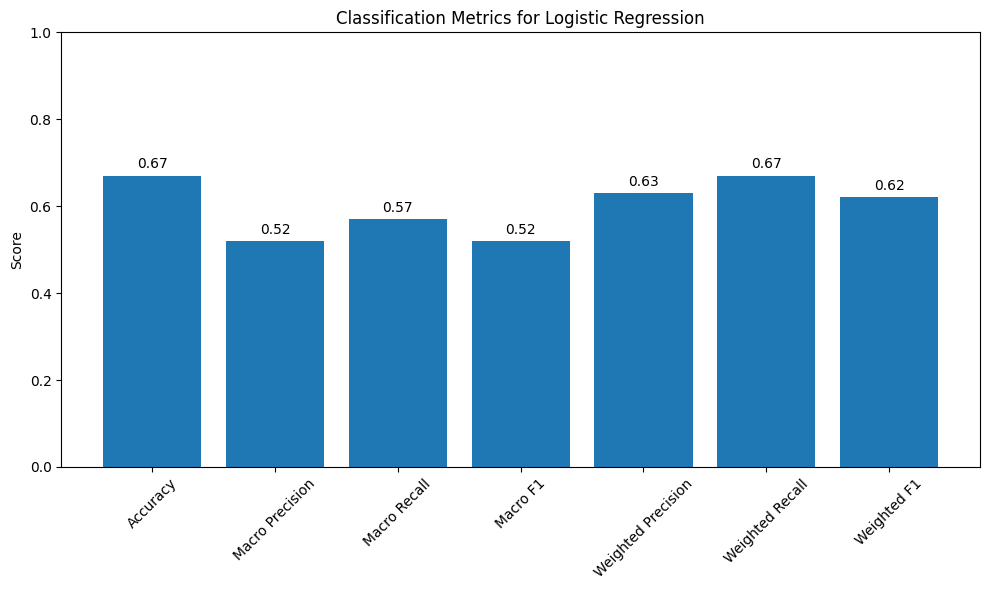

In [26]:
import matplotlib.pyplot as plt

# القيم من تقرير التصنيف
metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1', 'Weighted Precision', 'Weighted Recall', 'Weighted F1']
values = [0.67, 0.52, 0.57, 0.52, 0.63, 0.67, 0.62]

# رسم الرسم البياني
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Classification Metrics for Logistic Regression")
plt.ylabel("Score")
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

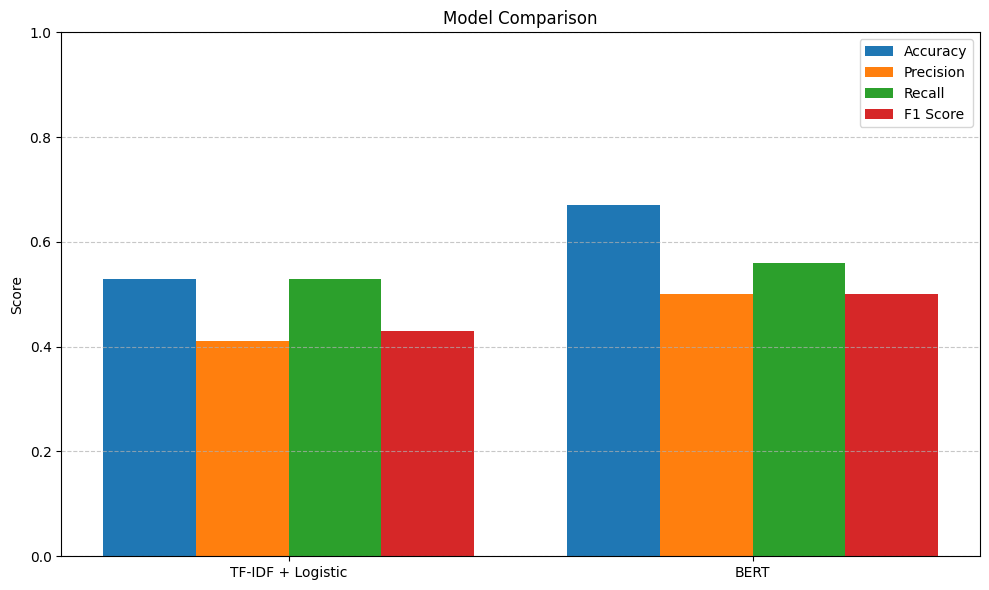

In [27]:
import matplotlib.pyplot as plt

# بيانات المقارنة بين النموذجين (مثال، استبدلها بالقيم الحقيقية)
model_names = ["TF-IDF + Logistic", "BERT"]
accuracy = [0.53, 0.67]
precision = [0.41, 0.50]
recall = [0.53, 0.56]
f1 = [0.43, 0.50]

# الرسم البياني
x = range(len(model_names))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar([i - 1.5 * width for i in x], accuracy, width, label="Accuracy")
plt.bar([i - 0.5 * width for i in x], precision, width, label="Precision")
plt.bar([i + 0.5 * width for i in x], recall, width, label="Recall")
plt.bar([i + 1.5 * width for i in x], f1, width, label="F1 Score")

plt.xticks(x, model_names)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()